<a href="https://colab.research.google.com/github/HilaShoshan/MusicGenreClassification/blob/main/MusicGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

**My Data**

The data contains music from the following genres:

*blues, classical, country, disco, hiphop, jazz, metal, pop, reggae and rock.* 

There are several data bases that refer to the same music, and I'm using each one as needed. 

**My Questions**

I want to know if it is possible to classify a song for its genre based on an audio segment from it. 

More specific sub-questions are: 


1.   What is the technique that will bring the best results?

2.   Will using machine learning techniques with the data from the CSV files
only yield good results?

3. Will deep learning techniques, like CNN on the pictures data will predict
the genre in a good way?

4. Are there types of songs that a model would have a very hard time
distinguishing between?

5. Do genres that are not at all close to each other still have the same
characteristics (for example in a certain part of the music)?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Read, Arrange and Split DataBases

# **Audio files dataset**

A collection of 10 genres with 100 audio (wav) files each, all having a length of 30 seconds. 

In [ ]:
dir = 'drive/MyDrive/Colab Notebooks/Data/'

In [ ]:
import librosa, IPython
import librosa.display as lplt

def playSong(song_path): 

  audio_fp = dir + song_path
  audio_data, sr = librosa.load(audio_fp)
  audio_data, _ = librosa.effects.trim(audio_data)

  return audio_data, audio_fp

In [ ]:
def plotSong(audio_data):

  plt.figure(figsize=(15,5))
  lplt.waveplot(audio_data)
  plt.show()

In [ ]:
# classical song example

class_audio_data, class_audio_fp = playSong("genres_original/classical/classical.00018.wav")
IPython.display.Audio(class_audio_fp)  # play sample file

In [ ]:
# country

count_audio_data, count_audio_fp = playSong("genres_original/country/country.00018.wav")
IPython.display.Audio(count_audio_fp)  # play sample file

In [ ]:
# metal

met_audio_data, met_audio_fp = playSong("genres_original/metal/metal.00018.wav")
IPython.display.Audio(met_audio_fp)  # play sample file

In [ ]:
# plot zoomed audio wave 

def plotAudioWaves(audio_data):
  start = 1000
  end = 1200
  plt.figure(figsize=(16,4))
  plt.plot(audio_data[start:end])
  plt.show()

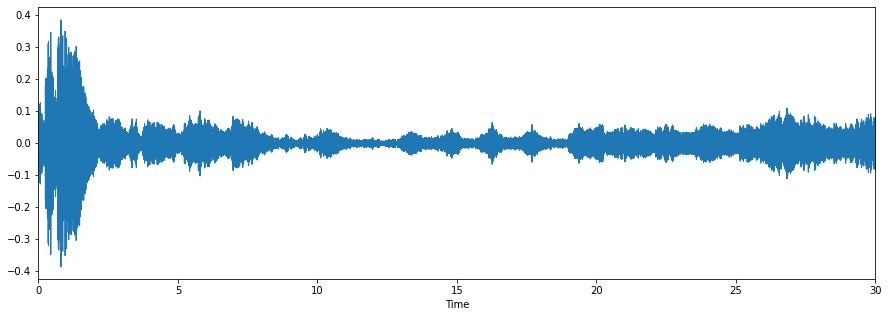

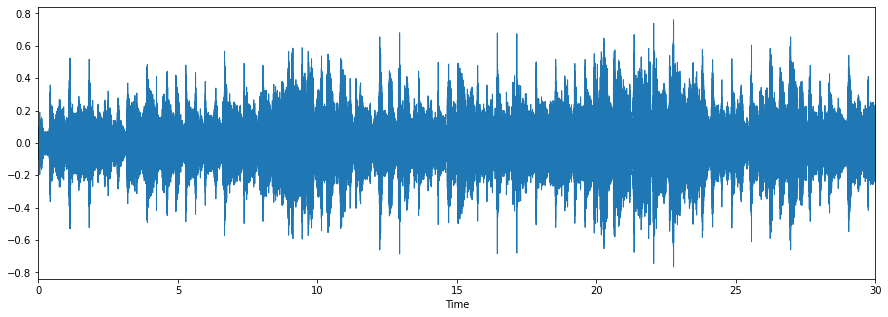

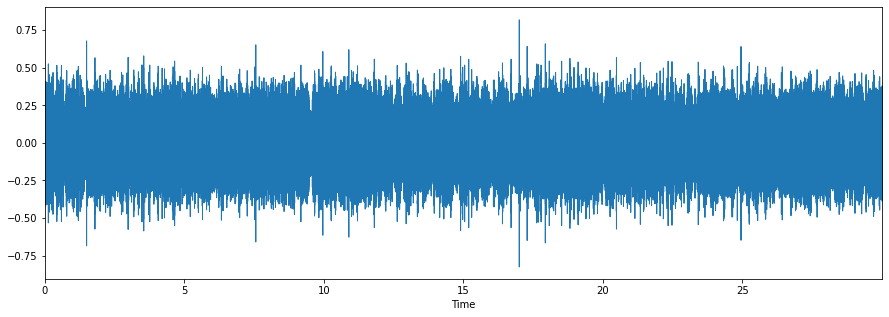

In [ ]:
for audio_data in [class_audio_data, count_audio_data, met_audio_data]:   
  plotSong(audio_data)
  # plotAudioWaves(audio_data)

# **Images dataset**

A visual representation for each audio file. The audio files were converted to Mel Spectrograms.

In [ ]:
import os
import matplotlib.image as mpimg

def showImg(genre): 
  img = mpimg.imread("drive/MyDrive/Colab Notebooks/Data/images_original/" + genre + "/" + genre + "00018.png")
  imgplot = plt.imshow(img)
  plt.show()

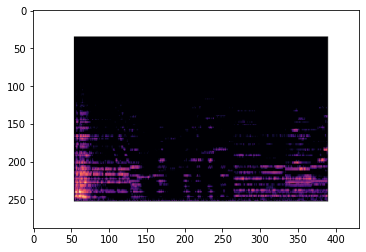

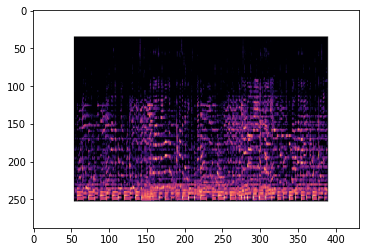

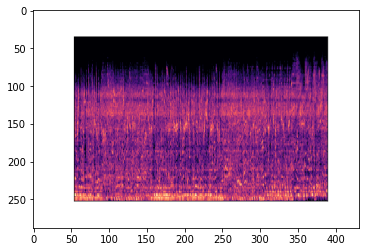

In [ ]:
for genre in ['classical', 'country', 'metal']:
  showImg(genre)

**Arrange images db**

In [ ]:
from skimage.transform import resize
from skimage.io import imread

In [ ]:
# A directory that contains one subdirectory per class
datadir = 'drive/MyDrive/Colab Notebooks/Data/images_original'

flat_data_arr=[]  # input array
target_arr=[]  # output array

for category in categories:
    print(f'loading... category : {category}')
    path = os.path.join(datadir, category)  # a path to the specific category's subdirectory
    for img in os.listdir(path):  # for each file (image) in the subdirectory
        img_array = imread(os.path.join(path, img))  # load an image from file
        img_resized = resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(category)  
    print(f'loaded category : {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)  # dataframe
df['label'] = target
X_img = df.iloc[:,:-1]  # input data 
y_img = df.iloc[:,-1]  # output data

loading... category : blues
loaded category : blues successfully
loading... category : classical
loaded category : classical successfully
loading... category : country
loaded category : country successfully
loading... category : disco
loaded category : disco successfully
loading... category : hiphop
loaded category : hiphop successfully
loading... category : jazz
loaded category : jazz successfully
loading... category : metal
loaded category : metal successfully
loading... category : pop
loaded category : pop successfully
loading... category : reggae
loaded category : reggae successfully
loading... category : rock
loaded category : rock successfully


In [ ]:
X_img

0         1         2      ...     67497     67498     67499
0    0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
1    0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
2    0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
3    0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
4    0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
..        ...       ...       ...  ...       ...       ...       ...
994  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
995  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
996  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
997  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078
998  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078

[999 rows x 67500 columns]

In [ ]:
y_img

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
994     rock
995     rock
996     rock
997     rock
998     rock
Name: label, Length: 999, dtype: object

**Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_img, y_img, test_size=0.2, random_state=77, stratify = y_img)

print(X_train_img.shape)
print(X_test_img.shape)
print(y_train_img.shape)
print(y_test_img.shape)

(799, 67500)
(200, 67500)
(799,)
(200,)


# **CSV dataset**

Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models).

I'll use both of them in parallel and see who gives better results. 

In [ ]:
features_df30 = pd.read_csv("drive/MyDrive/Colab Notebooks/Data/features_30_sec.csv")
features_df30.head(10)

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0  blues.00000.wav  661794          0.350088  ...     1.221291   46.936035  blues
1  blues.00001.wav  661794          0.340914  ...     0.531217   45.786282  blues
2  blues.00002.wav  661794          0.363637  ...    -2.231258   30.573025  blues
3  blues.00003.wav  661794          0.404785  ...    -3.407448   31.949339  blues
4  blues.00004.wav  661794          0.308526  ...   -11.703234   55.195160  blues
5  blues.00005.wav  661794          0.302456  ...    -8.109991   46.311005  blues
6  blues.00006.wav  661794          0.291328  ...    -6.483466   70.170364  blues
7  blues.00007.wav  661794          0.307955  ...    -8.630722   56.401436  blues
8  blues.00008.wav  661794          0.408879  ...    -2.715692   36.418430  blues
9  blues.00009.wav  661794          0.273950  ...    -4.235203   91.468811  blues

[10 rows x 60 columns]

In [ ]:
features_df3 = pd.read_csv("drive/MyDrive/Colab Notebooks/Data/features_3_sec.csv")
features_df3.head(10)

filename  length  chroma_stft_mean  ...  mfcc20_mean  mfcc20_var  label
0  blues.00000.0.wav   66149          0.335406  ...    -0.243027   43.771767  blues
1  blues.00000.1.wav   66149          0.343065  ...     5.784063   59.943081  blues
2  blues.00000.2.wav   66149          0.346815  ...     2.517375   33.105122  blues
3  blues.00000.3.wav   66149          0.363639  ...     3.630866   32.023678  blues
4  blues.00000.4.wav   66149          0.335579  ...     0.536961   29.146694  blues
5  blues.00000.5.wav   66149          0.376670  ...     3.025218   28.892687  blues
6  blues.00000.6.wav   66149          0.379909  ...     3.276939   25.999132  blues
7  blues.00000.7.wav   66149          0.331880  ...     0.210787   42.512966  blues
8  blues.00000.8.wav   66149          0.347877  ...     3.758598   97.618835  blues
9  blues.00000.9.wav   66149          0.358061  ...     0.791776   40.416420  blues

[10 rows x 60 columns]

In [ ]:
print(features_df30.shape, '\n')

print(features_df30.isnull().sum())

(1000, 60) 

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
m

In [ ]:
print(features_df3.shape, '\n')

print(features_df3.isnull().sum())

(9990, 60) 

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
m

In [ ]:
# features_df.describe()

features_df30.label.value_counts().reset_index()

index  label
0     hiphop    100
1        pop    100
2      disco    100
3       jazz    100
4  classical    100
5       rock    100
6      blues    100
7      metal    100
8     reggae    100
9    country    100

In [ ]:
features_df3.label.value_counts().reset_index()

index  label
0        pop   1000
1     reggae   1000
2      blues   1000
3       jazz   1000
4      metal   1000
5      disco    999
6  classical    998
7       rock    998
8     hiphop    998
9    country    997

**Arrange Dataset**

In [ ]:
del features_df30['filename']
del features_df3['filename']

print(features_df30.shape)
print(features_df3.shape)

(1000, 59)
(9990, 59)


In [ ]:
features_df30

length  chroma_stft_mean  chroma_stft_var  ...  mfcc20_mean  mfcc20_var  label
0    661794          0.350088         0.088757  ...     1.221291   46.936035  blues
1    661794          0.340914         0.094980  ...     0.531217   45.786282  blues
2    661794          0.363637         0.085275  ...    -2.231258   30.573025  blues
3    661794          0.404785         0.093999  ...    -3.407448   31.949339  blues
4    661794          0.308526         0.087841  ...   -11.703234   55.195160  blues
..      ...               ...              ...  ...          ...         ...    ...
995  661794          0.352063         0.080487  ...    -1.193787   49.950665   rock
996  661794          0.398687         0.075086  ...    -2.795338   31.773624   rock
997  661794          0.432142         0.075268  ...    -2.106337   29.865515   rock
998  661794          0.362485         0.091506  ...    -3.590644   41.299088   rock
999  661794          0.358401         0.085884  ...     1.155239   49.662510   rock

[1000 rows x 59 columns]

In [ ]:
# Split the data into X (features dataframe) and y (the label column)

X_csv30 = features_df30.iloc[:, 0:-2]
y_csv30 = features_df30[['label']]   

X_csv3 = features_df3.iloc[:, 0:-2]
y_csv3 = features_df3[['label']]  

In [ ]:
print(X_csv30.shape)
print(y_csv30.shape, '\n')

print(X_csv3.shape)
print(y_csv3.shape, '\n')

(1000, 57)
(1000, 1) 

(9990, 57)
(9990, 1) 



In [ ]:
# Now I'll normalize the X data: 

from sklearn import preprocessing

def normalization(X_csv):
  x = X_csv.values  # returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  X_norm = pd.DataFrame(x_scaled)
  return X_norm

In [ ]:
X_norm30 = normalization(X_csv30)
X_norm3 = normalization(X_csv3)

X_norm30

0         1         2   ...        54        55        56
0    0.113487  0.362279  0.695468  ...  0.487950  0.109503  0.599189
1    0.113487  0.343622  0.793392  ...  0.548800  0.099081  0.579640
2    0.113487  0.389832  0.640692  ...  0.453724  0.087317  0.501381
3    0.113487  0.473508  0.777954  ...  0.538690  0.062612  0.468060
4    0.113487  0.277759  0.681062  ...  0.424652  0.130173  0.233047
..        ...       ...       ...  ...       ...       ...       ...
995  0.113487  0.366294  0.565355  ...  0.355114  0.108986  0.530772
996  0.113487  0.461109  0.480368  ...  0.332575  0.067713  0.485401
997  0.113487  0.529141  0.483246  ...  0.178146  0.076420  0.504920
998  0.113487  0.387488  0.738721  ...  0.405462  0.088864  0.462871
999  0.113487  0.379184  0.650272  ...  0.496317  0.154611  0.597318

[1000 rows x 57 columns]

**train test split**

In [ ]:
X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30 = train_test_split(X_norm30, y_csv30, test_size=0.2, shuffle=True)
X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3 = train_test_split(X_norm3, y_csv3, test_size=0.2, shuffle=True)

In [ ]:
# 30 seconds dataset train - test split

print(X_train_csv30.shape)
print(X_test_csv30.shape)
print(y_train_csv30.shape)
print(y_test_csv30.shape)

(800, 57)
(200, 57)
(800, 1)
(200, 1)


In [ ]:
# 3 seconds dataset

print(X_train_csv3.shape)
print(X_test_csv3.shape)
print(y_train_csv3.shape)
print(y_test_csv3.shape)

(7992, 57)
(1998, 57)
(7992, 1)
(1998, 1)


In [ ]:
X_train_csv30

0         1         2   ...        54        55        56
291  0.113487  0.369085  0.691672  ...  0.579166  0.144198  0.417191
419  0.113487  0.528946  0.748053  ...  0.568310  0.197792  0.478561
972  0.113487  0.470763  0.627980  ...  0.314465  0.115713  0.585456
309  0.113487  0.549224  0.535480  ...  0.507094  0.077652  0.539211
240  0.113487  0.409837  0.654002  ...  0.453524  0.072408  0.278277
..        ...       ...       ...  ...       ...       ...       ...
611  0.095142  0.689406  0.352195  ...  0.468491  0.021324  0.689045
917  0.113487  0.502181  0.505899  ...  0.446688  0.074342  0.560075
108  0.113487  0.168409  0.624134  ...  0.493766  0.286157  0.585971
446  0.113487  0.651431  0.605003  ...  0.521385  0.039801  0.489935
39   0.113487  0.169410  0.827537  ...  0.323330  0.198320  0.361169

[800 rows x 57 columns]

In [ ]:
y_train_csv30

label
291    country
419     hiphop
972       rock
309      disco
240    country
..         ...
611      metal
917       rock
108  classical
446     hiphop
39       blues

[800 rows x 1 columns]

# Machine Learning Techniques

Applying models on the CSV datasets and on the images dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
# helps to loop through predefined hyperparameters and fit the model on the training set.
# So, in the end, you can select the best parameters from the listed hyperparameters.

param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

In [ ]:
def apply_classifier(clf, X_train, X_test, y_train, y_test, type='df', grid=False): 
  """
  Apply the given clf classifier on the given training data
  Predict the labels for X_test 
  Compute the Accuracy of the model
  
  parameters:
  type: the x and y type of data (df -- pandas dataframe or list -- np lists)
  grid: a boolean parameter which tells if use the GridSearchCV or not
  """

  # use GridSearchCV if asked 
  if grid:
    GridSearchCV(clf, param_grid)

  # Train the model using the training sets
  if type == 'df':
    y_train = y_train.values.ravel()
  model = clf.fit(X_train, y_train)

  # Predict the response for test dataset
  y_pred = model.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

  return y_pred

## Logistic Regression

In [ ]:
# Apply a multiclass logistic regression on the data
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
logistic = LogisticRegression(random_state=0, max_iter=2000)

In [ ]:
# 30 seconds dataset
apply_classifier(logistic, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)  

Accuracy: 0.735


array(['blues', 'reggae', 'classical', 'metal', 'reggae', 'blues',
       'hiphop', 'jazz', 'jazz', 'rock', 'hiphop', 'blues', 'metal',
       'hiphop', 'blues', 'rock', 'metal', 'blues', 'classical', 'rock',
       'classical', 'classical', 'disco', 'rock', 'pop', 'classical',
       'reggae', 'blues', 'pop', 'metal', 'hiphop', 'country', 'disco',
       'hiphop', 'rock', 'blues', 'classical', 'jazz', 'pop', 'pop',
       'pop', 'metal', 'metal', 'hiphop', 'metal', 'pop', 'jazz', 'jazz',
       'blues', 'country', 'pop', 'reggae', 'metal', 'classical', 'disco',
       'classical', 'disco', 'hiphop', 'blues', 'metal', 'pop', 'hiphop',
       'reggae', 'blues', 'blues', 'disco', 'pop', 'disco', 'disco',
       'pop', 'classical', 'pop', 'reggae', 'pop', 'rock', 'reggae',
       'pop', 'reggae', 'hiphop', 'hiphop', 'metal', 'rock', 'country',
       'hiphop', 'reggae', 'blues', 'country', 'country', 'pop', 'disco',
       'jazz', 'rock', 'country', 'jazz', 'classical', 'country',
       

In [ ]:
# 3 seconds dataset
apply_classifier(logistic, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)  

Accuracy: 0.6966966966966966


array(['country', 'blues', 'hiphop', ..., 'disco', 'pop', 'reggae'],
      dtype=object)

In [ ]:
# images dataset
apply_classifier(logistic, X_train_img, X_test_img, y_train_img, y_test_img) 

Accuracy: 0.525


array(['metal', 'blues', 'disco', 'pop', 'jazz', 'hiphop', 'reggae',
       'country', 'classical', 'pop', 'blues', 'country', 'disco',
       'hiphop', 'metal', 'rock', 'country', 'blues', 'pop', 'disco',
       'pop', 'jazz', 'metal', 'jazz', 'hiphop', 'jazz', 'jazz', 'metal',
       'pop', 'reggae', 'pop', 'rock', 'jazz', 'blues', 'rock', 'disco',
       'classical', 'country', 'reggae', 'hiphop', 'jazz', 'metal',
       'jazz', 'disco', 'classical', 'metal', 'hiphop', 'metal', 'rock',
       'classical', 'reggae', 'jazz', 'hiphop', 'disco', 'disco', 'rock',
       'jazz', 'country', 'reggae', 'country', 'jazz', 'rock', 'rock',
       'pop', 'country', 'pop', 'country', 'metal', 'classical', 'blues',
       'reggae', 'pop', 'reggae', 'hiphop', 'pop', 'classical', 'jazz',
       'reggae', 'disco', 'disco', 'blues', 'blues', 'reggae', 'hiphop',
       'hiphop', 'country', 'blues', 'reggae', 'hiphop', 'classical',
       'classical', 'classical', 'rock', 'hiphop', 'disco', 'jazz',
    

## SVC

In [ ]:
# Import Support Vector Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Create a svm Classifier
lin_svc = LinearSVC(dual=False)  # Linear Kernel

In [ ]:
# 30 seconds dataset 
y_pred_svc30 = apply_classifier(lin_svc, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30, grid=True)  
y_pred_svc30

Accuracy: 0.74


array(['country', 'reggae', 'classical', 'metal', 'disco', 'blues',
       'hiphop', 'jazz', 'jazz', 'rock', 'hiphop', 'blues', 'metal',
       'hiphop', 'country', 'rock', 'metal', 'blues', 'classical',
       'disco', 'classical', 'classical', 'metal', 'rock', 'pop',
       'classical', 'reggae', 'blues', 'pop', 'metal', 'hiphop',
       'country', 'reggae', 'hiphop', 'rock', 'blues', 'classical',
       'jazz', 'pop', 'pop', 'pop', 'metal', 'metal', 'hiphop', 'metal',
       'pop', 'jazz', 'jazz', 'blues', 'country', 'pop', 'reggae',
       'metal', 'classical', 'disco', 'classical', 'disco', 'hiphop',
       'blues', 'disco', 'pop', 'hiphop', 'reggae', 'blues', 'blues',
       'disco', 'disco', 'disco', 'disco', 'pop', 'classical', 'pop',
       'reggae', 'pop', 'rock', 'reggae', 'pop', 'reggae', 'hiphop',
       'disco', 'metal', 'rock', 'country', 'rock', 'reggae', 'blues',
       'country', 'country', 'pop', 'pop', 'jazz', 'country', 'country',
       'jazz', 'country', 'country

In [ ]:
# 30 seconds dataset 
y_pred_svc3 = apply_classifier(lin_svc, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3, grid=True)  
y_pred_svc3

Accuracy: 0.6841841841841841


array(['jazz', 'jazz', 'metal', ..., 'pop', 'jazz', 'jazz'], dtype=object)

In [ ]:
# images dataset
apply_classifier(lin_svc, X_train_img, X_test_img, y_train_img, y_test_img)  

Accuracy: 0.505


array(['metal', 'reggae', 'disco', 'pop', 'jazz', 'hiphop', 'reggae',
       'country', 'classical', 'disco', 'blues', 'country', 'disco',
       'hiphop', 'metal', 'metal', 'country', 'blues', 'pop', 'disco',
       'pop', 'jazz', 'metal', 'reggae', 'metal', 'jazz', 'jazz', 'metal',
       'pop', 'reggae', 'disco', 'blues', 'jazz', 'blues', 'rock',
       'disco', 'classical', 'hiphop', 'reggae', 'hiphop', 'jazz',
       'metal', 'jazz', 'disco', 'classical', 'metal', 'hiphop', 'metal',
       'rock', 'classical', 'reggae', 'jazz', 'hiphop', 'disco', 'hiphop',
       'rock', 'jazz', 'country', 'reggae', 'country', 'jazz', 'rock',
       'hiphop', 'pop', 'country', 'pop', 'country', 'metal', 'rock',
       'blues', 'blues', 'pop', 'reggae', 'reggae', 'pop', 'classical',
       'jazz', 'reggae', 'metal', 'disco', 'blues', 'blues', 'reggae',
       'hiphop', 'jazz', 'country', 'blues', 'reggae', 'hiphop',
       'classical', 'classical', 'classical', 'classical', 'hiphop',
       'disco'

## Adaboost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifier object
# use the default DecisionTreeClassifier as base_estimator

adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

In [ ]:
# 30 seconds dataset
apply_classifier(adaboost, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)  

Accuracy: 0.41


array(['country', 'country', 'metal', 'reggae', 'disco', 'disco', 'rock',
       'jazz', 'reggae', 'hiphop', 'reggae', 'metal', 'country', 'disco',
       'jazz', 'country', 'jazz', 'disco', 'rock', 'metal', 'jazz',
       'jazz', 'blues', 'reggae', 'disco', 'hiphop', 'metal', 'blues',
       'hiphop', 'rock', 'rock', 'disco', 'hiphop', 'reggae', 'country',
       'disco', 'rock', 'country', 'metal', 'jazz', 'metal', 'reggae',
       'blues', 'country', 'jazz', 'disco', 'disco', 'country', 'hiphop',
       'reggae', 'hiphop', 'disco', 'blues', 'hiphop', 'metal', 'jazz',
       'metal', 'country', 'jazz', 'jazz', 'country', 'country', 'reggae',
       'disco', 'country', 'reggae', 'reggae', 'rock', 'rock', 'disco',
       'disco', 'disco', 'rock', 'rock', 'metal', 'blues', 'metal',
       'jazz', 'hiphop', 'reggae', 'rock', 'hiphop', 'disco', 'rock',
       'metal', 'metal', 'jazz', 'rock', 'country', 'country', 'country',
       'disco', 'country', 'disco', 'reggae', 'disco', 'rock', '

In [ ]:
# 3 seconds dataset
apply_classifier(adaboost, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)  

Accuracy: 0.527027027027027


array(['reggae', 'hiphop', 'jazz', ..., 'country', 'country', 'jazz'],
      dtype=object)

In [ ]:
# images dataset
apply_classifier(adaboost, X_train_img, X_test_img, y_train_img, y_test_img)  

Accuracy: 0.32


array(['metal', 'blues', 'hiphop', 'jazz', 'jazz', 'reggae', 'reggae',
       'rock', 'reggae', 'disco', 'blues', 'hiphop', 'rock', 'disco',
       'metal', 'rock', 'country', 'jazz', 'pop', 'country', 'disco',
       'reggae', 'rock', 'blues', 'blues', 'disco', 'country', 'metal',
       'hiphop', 'blues', 'pop', 'rock', 'blues', 'country', 'country',
       'disco', 'blues', 'country', 'blues', 'hiphop', 'reggae', 'disco',
       'jazz', 'disco', 'jazz', 'rock', 'reggae', 'metal', 'disco',
       'blues', 'reggae', 'jazz', 'country', 'rock', 'rock', 'disco',
       'blues', 'country', 'hiphop', 'country', 'country', 'country',
       'blues', 'rock', 'jazz', 'reggae', 'blues', 'rock', 'disco',
       'country', 'country', 'hiphop', 'hiphop', 'hiphop', 'pop', 'jazz',
       'jazz', 'country', 'blues', 'blues', 'rock', 'blues', 'jazz',
       'hiphop', 'disco', 'reggae', 'hiphop', 'reggae', 'disco',
       'classical', 'jazz', 'classical', 'disco', 'disco', 'disco',
       'country', '

In [ ]:
# use SVC as base_estimator

svc = SVC(probability=True, kernel='linear', max_iter=500)

# Create adaboost classifier object
adaboost = AdaBoostClassifier(n_estimators=500, base_estimator=svc, learning_rate=1) 

In [ ]:
# 30 seconds dataset
apply_classifier(adaboost, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30) 

Accuracy: 0.22


array(['country', 'jazz', 'rock', 'reggae', 'reggae', 'country', 'jazz',
       'jazz', 'country', 'rock', 'reggae', 'rock', 'country', 'country',
       'classical', 'country', 'jazz', 'reggae', 'rock', 'rock', 'jazz',
       'country', 'rock', 'rock', 'rock', 'pop', 'rock', 'rock',
       'country', 'rock', 'jazz', 'reggae', 'rock', 'country', 'rock',
       'reggae', 'reggae', 'country', 'rock', 'jazz', 'reggae', 'blues',
       'jazz', 'country', 'jazz', 'jazz', 'rock', 'country', 'rock',
       'reggae', 'rock', 'country', 'country', 'reggae', 'rock',
       'country', 'rock', 'jazz', 'country', 'jazz', 'country', 'rock',
       'country', 'rock', 'country', 'reggae', 'country', 'rock', 'jazz',
       'jazz', 'reggae', 'pop', 'country', 'jazz', 'rock', 'country',
       'rock', 'jazz', 'country', 'rock', 'jazz', 'country', 'reggae',
       'reggae', 'rock', 'jazz', 'country', 'rock', 'rock', 'jazz',
       'rock', 'jazz', 'country', 'reggae', 'country', 'country', 'jazz',
       '

## KNN

k nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create knn classifier object
knn = KNeighborsClassifier(n_neighbors=19)

In [ ]:
# 30 seconds dataset
apply_classifier(knn, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)  

Accuracy: 0.6


array(['country', 'hiphop', 'country', 'metal', 'hiphop', 'disco',
       'metal', 'jazz', 'classical', 'country', 'pop', 'blues', 'metal',
       'hiphop', 'country', 'country', 'metal', 'blues', 'classical',
       'disco', 'classical', 'classical', 'disco', 'rock', 'pop',
       'classical', 'reggae', 'country', 'pop', 'metal', 'disco',
       'country', 'country', 'pop', 'rock', 'blues', 'classical', 'blues',
       'pop', 'pop', 'pop', 'metal', 'metal', 'hiphop', 'metal', 'pop',
       'jazz', 'disco', 'country', 'country', 'pop', 'country', 'metal',
       'classical', 'disco', 'classical', 'disco', 'reggae', 'country',
       'metal', 'pop', 'hiphop', 'reggae', 'country', 'rock', 'disco',
       'disco', 'disco', 'disco', 'pop', 'classical', 'pop', 'disco',
       'pop', 'disco', 'reggae', 'pop', 'reggae', 'reggae', 'disco',
       'blues', 'country', 'country', 'hiphop', 'reggae', 'blues',
       'country', 'country', 'pop', 'disco', 'disco', 'rock', 'country',
       'country'

In [ ]:
# 3 seconds dataset
apply_classifier(knn, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)  

Accuracy: 0.8343343343343343


array(['rock', 'rock', 'pop', ..., 'disco', 'pop', 'reggae'], dtype=object)

In [ ]:
# images dataset
apply_classifier(knn, X_train_img, X_test_img, y_train_img, y_test_img)  

Accuracy: 0.245


array(['metal', 'hiphop', 'hiphop', 'reggae', 'reggae', 'hiphop',
       'reggae', 'hiphop', 'blues', 'hiphop', 'hiphop', 'hiphop', 'metal',
       'hiphop', 'metal', 'metal', 'hiphop', 'reggae', 'hiphop', 'pop',
       'pop', 'hiphop', 'metal', 'blues', 'hiphop', 'hiphop', 'disco',
       'metal', 'hiphop', 'hiphop', 'hiphop', 'metal', 'hiphop', 'hiphop',
       'disco', 'metal', 'disco', 'hiphop', 'reggae', 'reggae', 'reggae',
       'hiphop', 'reggae', 'metal', 'disco', 'metal', 'hiphop', 'metal',
       'hiphop', 'classical', 'hiphop', 'hiphop', 'hiphop', 'disco',
       'hiphop', 'disco', 'hiphop', 'hiphop', 'reggae', 'country',
       'hiphop', 'disco', 'disco', 'metal', 'hiphop', 'reggae', 'disco',
       'metal', 'pop', 'blues', 'hiphop', 'hiphop', 'hiphop', 'hiphop',
       'hiphop', 'hiphop', 'reggae', 'hiphop', 'disco', 'hiphop', 'metal',
       'hiphop', 'hiphop', 'hiphop', 'metal', 'hiphop', 'hiphop',
       'reggae', 'hiphop', 'blues', 'hiphop', 'classical', 'rock',
     

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [ ]:
# 30 seconds dataset
apply_classifier(clf, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)  

Accuracy: 0.59


array(['classical', 'pop', 'disco', 'metal', 'country', 'country',
       'metal', 'jazz', 'jazz', 'country', 'hiphop', 'country', 'country',
       'hiphop', 'reggae', 'country', 'metal', 'blues', 'classical',
       'blues', 'classical', 'classical', 'metal', 'disco', 'pop',
       'classical', 'reggae', 'country', 'pop', 'metal', 'hiphop', 'rock',
       'reggae', 'hiphop', 'disco', 'blues', 'classical', 'blues', 'pop',
       'pop', 'pop', 'metal', 'hiphop', 'hiphop', 'metal', 'pop', 'jazz',
       'jazz', 'blues', 'country', 'pop', 'reggae', 'metal', 'classical',
       'hiphop', 'classical', 'disco', 'reggae', 'reggae', 'disco', 'pop',
       'disco', 'pop', 'blues', 'blues', 'country', 'blues', 'metal',
       'disco', 'pop', 'classical', 'pop', 'reggae', 'pop', 'disco',
       'reggae', 'pop', 'reggae', 'reggae', 'disco', 'reggae', 'disco',
       'country', 'hiphop', 'reggae', 'blues', 'pop', 'rock', 'pop',
       'disco', 'blues', 'blues', 'rock', 'jazz', 'country', 'country'

In [ ]:
# 3 seconds dataset
apply_classifier(clf, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)  

Accuracy: 0.6646646646646647


array(['metal', 'blues', 'pop', ..., 'rock', 'pop', 'rock'], dtype=object)

In [ ]:
# images dataset
apply_classifier(clf, X_train_img, X_test_img, y_train_img, y_test_img)  

Accuracy: 0.325


array(['metal', 'country', 'pop', 'classical', 'jazz', 'disco',
       'classical', 'country', 'disco', 'pop', 'hiphop', 'disco', 'blues',
       'disco', 'metal', 'rock', 'country', 'jazz', 'pop', 'country',
       'jazz', 'blues', 'hiphop', 'classical', 'disco', 'blues',
       'country', 'metal', 'pop', 'jazz', 'classical', 'metal', 'jazz',
       'hiphop', 'rock', 'rock', 'classical', 'hiphop', 'classical',
       'disco', 'blues', 'pop', 'reggae', 'disco', 'classical', 'metal',
       'disco', 'metal', 'pop', 'classical', 'hiphop', 'jazz', 'rock',
       'metal', 'blues', 'disco', 'rock', 'reggae', 'classical', 'metal',
       'jazz', 'blues', 'country', 'country', 'country', 'disco', 'rock',
       'metal', 'classical', 'rock', 'reggae', 'blues', 'reggae',
       'hiphop', 'rock', 'rock', 'jazz', 'hiphop', 'disco', 'reggae',
       'jazz', 'country', 'reggae', 'jazz', 'pop', 'hiphop', 'pop',
       'reggae', 'country', 'jazz', 'country', 'jazz', 'blues', 'disco',
       'blues', 

## XGBClassifier

Extreme Gradient Boosting 

In [ ]:
# Cross Gradient Booster
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1)

In [ ]:
# 30 seconds dataset
y_pred_xgb_csv30 = apply_classifier(xgb, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)  
y_pred_xgb_csv30

Accuracy: 0.79


array(['country', 'classical', 'metal', 'hiphop', 'pop', 'reggae',
       'country', 'jazz', 'reggae', 'metal', 'reggae', 'disco', 'blues',
       'pop', 'classical', 'country', 'classical', 'disco', 'blues',
       'metal', 'classical', 'classical', 'blues', 'disco', 'country',
       'hiphop', 'metal', 'blues', 'hiphop', 'country', 'jazz', 'pop',
       'hiphop', 'reggae', 'metal', 'pop', 'hiphop', 'reggae', 'disco',
       'classical', 'hiphop', 'disco', 'jazz', 'blues', 'classical',
       'jazz', 'rock', 'disco', 'hiphop', 'reggae', 'hiphop', 'country',
       'blues', 'hiphop', 'metal', 'jazz', 'metal', 'rock', 'jazz',
       'classical', 'country', 'blues', 'hiphop', 'metal', 'reggae',
       'hiphop', 'reggae', 'rock', 'jazz', 'hiphop', 'disco', 'pop',
       'rock', 'disco', 'metal', 'blues', 'metal', 'jazz', 'reggae',
       'disco', 'jazz', 'hiphop', 'disco', 'reggae', 'metal', 'disco',
       'jazz', 'metal', 'country', 'jazz', 'country', 'pop', 'country',
       'pop', 're

In [ ]:
# 3 seconds dataset
y_pred_xgb_csv3 = apply_classifier(xgb, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)  
y_pred_xgb_csv3

Accuracy: 0.8988988988988988


array(['reggae', 'hiphop', 'jazz', ..., 'country', 'blues', 'classical'],
      dtype=object)

## PCA

Principal component analysis

In [ ]:
# PCA 2 COMPONENTS
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit the model with X_train and apply the dimensionality reduction on it.
pc = pca.fit_transform(X_train_csv3)  
pc_df = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([pc_df, y_train_csv3], axis = 1)

# pca.explained_variance_ratio_

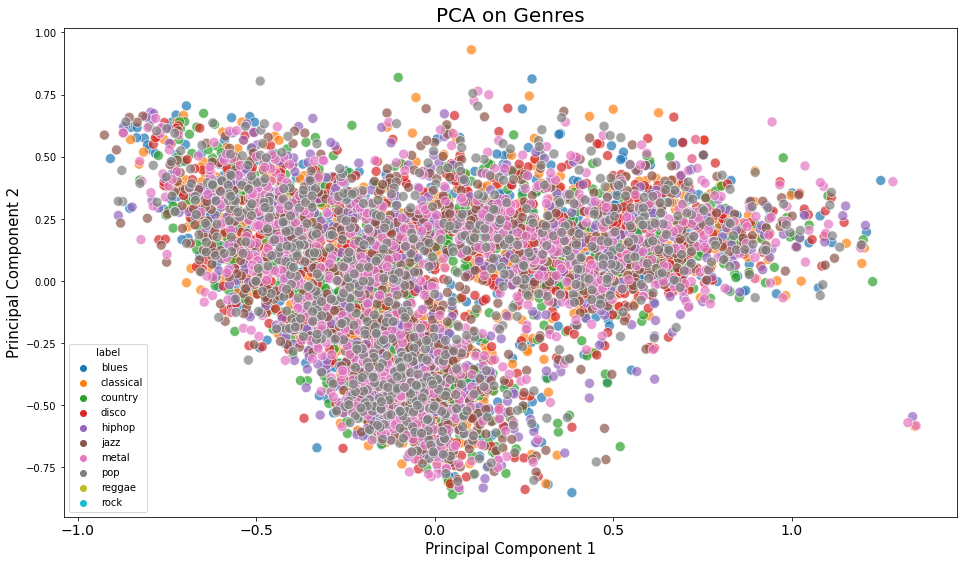

In [ ]:
# Plot 

import seaborn as sns

plt.figure(figsize = (16, 9))
sns.scatterplot(x="pc1", y="pc2", data=finalDf, hue="label", alpha=0.7, s=100);

plt.title('PCA on Genres', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.savefig("PCA_Scattert.png")
plt.show()

In [ ]:
# Accuracy

pca.score(X_test_csv3, y_test_csv3)

61.794554529783035

# Deep Learning Techniques

## CNN: Convolutional Neural Network

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

**Arrange image dataset (again) using tensorflow.kares**

In [ ]:
# A directory that contains one subdirectory per class
directory = 'drive/MyDrive/Colab Notebooks/Data/images_original'

# normalize the images' pixels to be between 0 to 1
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2)  # dertemine validation size=0.2

In [ ]:
batch_size = 32
num_epochs = 12

In [ ]:
# generate training data
train_generator = data_gen.flow_from_directory(directory, 
                                           target_size=(300,300), 
                                           batch_size=batch_size, 
                                           class_mode='categorical',
                                           subset='training')  # set as training data  

# generate validation data
validation_generator = data_gen.flow_from_directory(directory, 
                                           target_size=(300,300), 
                                           batch_size=batch_size, 
                                           class_mode='categorical',
                                           subset='validation')  # set as validation data

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


**The Model**

In [ ]:
# import Very Deep Convolutional Networks for Large-Scale Image Recognition
from tensorflow.keras.applications import VGG16

model = VGG16(include_top=False, input_shape=(300,300,3))

In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
output=model.layers[-1].output
model_final = tf.keras.layers.Flatten()(output)
model_final = tf.keras.layers.Dense(512,activation='relu')(model_final)
model_final = tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final = tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final = tf.keras.layers.Dense(10,activation='softmax')(model_final)

In [ ]:
model = tf.keras.models.Model(model.input, model_final)

In [ ]:
# Model Compilation

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
# Model Training

history = model.fit(
                x = train_generator, 
                steps_per_epoch = train_generator.samples // batch_size,
                validation_data = validation_generator, 
                validation_steps = validation_generator.samples // batch_size,
                epochs = num_epochs)

Epoch 1/12
25/25 [==============================] - 870s 35s/step - loss: 2.3625 - acc: 0.2387 - val_loss: 1.8051 - val_acc: 0.3385
Epoch 2/12
25/25 [==============================] - 903s 36s/step - loss: 1.4660 - acc: 0.4500 - val_loss: 1.4167 - val_acc: 0.5469
Epoch 3/12
25/25 [==============================] - 898s 36s/step - loss: 1.1270 - acc: 0.6025 - val_loss: 1.7159 - val_acc: 0.3438
Epoch 4/12
25/25 [==============================] - 862s 35s/step - loss: 1.0447 - acc: 0.6612 - val_loss: 1.2803 - val_acc: 0.5833
Epoch 5/12
25/25 [==============================] - 897s 36s/step - loss: 0.7549 - acc: 0.7763 - val_loss: 1.2472 - val_acc: 0.6042
Epoch 6/12
25/25 [==============================] - 900s 36s/step - loss: 0.5862 - acc: 0.8075 - val_loss: 1.2015 - val_acc: 0.5677
Epoch 7/12
25/25 [==============================] - 865s 35s/step - loss: 0.5207 - acc: 0.8425 - val_loss: 1.3522 - val_acc: 0.5885
Epoch 8/12
25/25 [==============================] - 897s 36s/step - loss: 0.

# The best model is ...
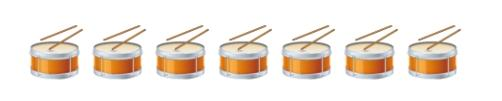



## **XGBClassifier** on the 3 seconds csv file - with ~ 90% accuracy

In [ ]:
y_pred_xgb_csv3

array(['hiphop', 'classical', 'reggae', ..., 'disco', 'country', 'hiphop'],
      dtype=object)

In [ ]:
y_test_csv3

label
4901     hiphop
1786  classical
8291     reggae
8463     reggae
1890  classical
...         ...
7709        pop
3827      disco
3249      disco
2868    country
4616     hiphop

[1998 rows x 1 columns]

Now let's answer my fourth and fifth questions from the beginning of the notebook:

**Are there types of songs that the model would have a very hard time
distinguishing between?**

**Do genres that are not at all close to each other still have the same
characteristics?**

To answer this, I'll show the **confusion matrix**:

The (i,j) cell equal to the number of observations known to be in group i and predicted to be in group j.

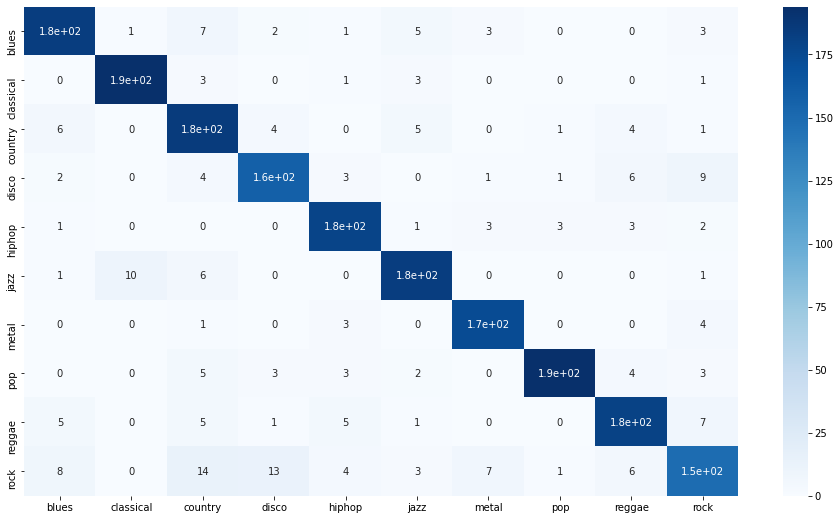

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matr = confusion_matrix(y_test_csv3, y_pred_xgb_csv3) 
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = categories,
            yticklabels = categories);

In [ ]:
# 3 seconds y_test data describe:

y_test_csv3.label.value_counts().reset_index()

index  label
0        pop    214
1      blues    206
2    country    206
3     reggae    205
4       rock    205
5       jazz    202
6  classical    202
7     hiphop    192
8      disco    184
9      metal    182

*The most difficult genre to identify is ...*

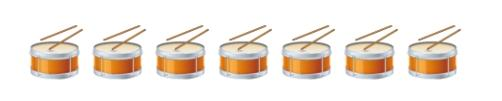

*Rock*

You can see on the confusion matrix that the model was wrong mostly with **rock** genre.

I think this is because the rock music genres consisting of subgenres of music. 
From Wikipedia [https://en.wikipedia.org/wiki/List_of_rock_genres] :
By the late 1960s, a number of identifiable rock music subgenres had emerged, including hybrids like blues rock, folk rock, country rock, and jazz-rock fusion. Later, new genres that emerged from it like heavy-metal and others. 

The dataset does not contain all the genres and sub-genres in the world, but only the general ones, so it makes sense that he would have a hard time distinguishing between certain genres. 

The mistakes were to both sides, i.e:


*   Of all the (205) times the real genre has been rock, the model was wrong and predict: 
    - 14 times country
    - 13 times disco
    - 8 times blues
    - 7 times metal
    - 6 times reggae
    - 4 times hiphop
    - 3 times jazz
    - 1 time pop
    - 0 times classical
    
    Other times (149) he was right and predicted rock. 


*   And when the actual genre was something that is not rock, the model predicted rock in a wrong way mostly on disco (9 times) and reggae (7 times).
Again, when the genre was classical, the model was wrong and predicted rock just one time. 

My Conclusions: 

*The genre that is most similar to rock is ...*

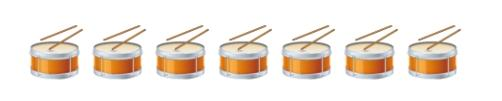

*Disco*

The reason is the model had a hard time distinguishing between them.

This similarity surprises me very much, because I have never seen these two genres as similar.

Because I'm not a music expert, I checked on Google if my intuition is right. 

There are a lot of **differences** between these two genres:

1. Disco music is largely high tempo and dance beat music whereas unlike rock.
2. Disco music uses a lot of string instruments like violins and cellos whereas such are not common with rock music.
3. Bass beat patterns differ greatly between rock sound and disco sound.

On the other hand, there are some surprising details that are **similar** between them:

1. Rock and pop bands use the same amount of instrumentation on stage, which is usually two guitars, one set of drums, and one bass guitar. 
2. Another similarity is the number of musicians on stage which includes: vocals, guitar players, bass player, drum player, and back vocals.

Probably these details greatly influenced the features in the data set (spectrograms, etc.), so the model found it difficult to distinguish between them.

And the most different genre from rock is *classical*.

*Another two genres that the model confused between them are:*

* jazz and classical (mostly when the actual was jazz)
* country and blues (to both sides)
* country and jazz (to both sides)

# Genres "Shazam" 


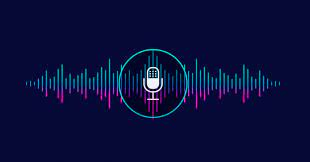

Let's create a system that receives as input a 3 seconds segment from a song and outputs  its genre, by using our chosen model. 

There are two ways to insert the input:
 
1.   As a local wav file
2.   Through the microphone, and then converted to a wav file.

I'm using https://github.com/GuitarsAI/AlgorithmsRepo/blob/master/microphone.ipynb code. 

**Microphone record to wav file code**

In [ ]:
!pip install pydub

In [ ]:
import ipywidgets as widgets
from IPython import display as disp
from IPython.display import display, Audio, clear_output
from google.colab import output
import base64
from pydub import AudioSegment
import io
import tempfile
import librosa

In [ ]:
# 
# original code: https://github.com/magenta/ddsp/blob/master/ddsp/colab/colab_utils.py
#

# Copyright 2020 The DDSP Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

def record_audio(seconds=3,
                 sample_rate=44100,
                 normalize_db=0.1):
    """Record audio from the browser in colab using javascript.
    Based on: https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be
    Args:
      seconds: Number of seconds to record.
      sample_rate: Resample recorded audio to this sample rate.
      normalize_db: Normalize the audio to this many decibels. Set to None to skip
        normalization step.
    Returns:
      An array of the recorded audio at sample_rate.
    """
    # Use Javascript to record audio.
    record_js_code = """
      const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
      const b2text = blob => new Promise(resolve => {
        const reader = new FileReader()
        reader.onloadend = e => resolve(e.srcElement.result)
        reader.readAsDataURL(blob)
      })
      var record = time => new Promise(async resolve => {
        stream = await navigator.mediaDevices.getUserMedia({ audio: true })
        recorder = new MediaRecorder(stream)
        chunks = []
        recorder.ondataavailable = e => chunks.push(e.data)
        recorder.start()
        await sleep(time)
        recorder.onstop = async ()=>{
          blob = new Blob(chunks)
          text = await b2text(blob)
          resolve(text)
        }
        recorder.stop()
      })
      """
    print('Starting recording for {} seconds...'.format(seconds-1))
    display(disp.Javascript(record_js_code))
    audio_string = output.eval_js('record(%d)' % (seconds * 1000.0))
    print('Finished recording!')
    audio_bytes = base64.b64decode(audio_string.split(',')[1])
    return audio_bytes_to_np(audio_bytes,
                             sample_rate=sample_rate,
                             normalize_db=normalize_db)
    
def audio_bytes_to_np(wav_data,
                      sample_rate=44100,
                      normalize_db=0.1):
    """Convert audio file data (in bytes) into a numpy array.
    Saves to a tempfile and loads with librosa.
    Args:
      wav_data: A byte stream of audio data.
      sample_rate: Resample recorded audio to this sample rate.
      normalize_db: Normalize the audio to this many decibels. Set to None to skip
        normalization step.
    Returns:
      An array of the recorded audio at sample_rate.
    """
    # Parse and normalize the audio.
    audio = AudioSegment.from_file(io.BytesIO(wav_data))
    audio.remove_dc_offset()
    if normalize_db is not None:
        audio.normalize(headroom=normalize_db)
    # Save to tempfile and load with librosa.
    with tempfile.NamedTemporaryFile(suffix='.wav') as temp_wav_file:
        fname = temp_wav_file.name
        audio.export(fname, format='wav')
        audio_np, unused_sr = librosa.load(fname, sr=sample_rate)
    return audio_np

**Compute features code**

In [ ]:
print("Number of columns: ", X_csv3.shape[1], '\n')
print("The columns: \n", X_csv3.columns)

Number of columns:  57 

The columns: 
 Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mf

In [ ]:
def compute_mean_var(features, last_var=True):
  new_features = []
  i = 0
  for feature in features:
    new_features.append(np.mean(feature))
    if last_var or i != len(features)-1:  
      new_features.append(np.var(feature))
    i+=1
  return new_features

In [ ]:
def get_features(audio):
  """
  Gets an audio file and calculates all the features that on the csv file
  Returns a list in length of 57 (num of columns on X), that can be used on model.predict 
  """

  length = 66149   # dont need to calculate it's mean and var

  features1 = []

  chroma_stft = librosa.feature.chroma_stft(y=audio).flatten()
  features1.append(chroma_stft)

  rms = librosa.feature.rms(y=audio).flatten()
  features1.append(rms)

  spectral_centroid = librosa.feature.spectral_centroid(y=audio).flatten()
  features1.append(spectral_centroid)

  spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio).flatten()
  features1.append(spectral_bandwidth)                                                          

  rolloff = librosa.feature.spectral_rolloff(y=audio + 0.01).flatten()
  features1.append(rolloff)                                           

  zero_crossing_rate = librosa.feature.zero_crossing_rate(audio).flatten()
  features1.append(zero_crossing_rate)              

  harmony = librosa.feature.tempogram(audio).flatten()  # probably wrong ... 
  features1.append(harmony)           

  # perceptr = librosa.perceptual_weighting(audio, freq)  ???
  # features.append(perceptr) 

  perceptr = [0]   # stam !!!!!!!
  features1.append(perceptr)

  tempo = librosa.beat.tempo(y=audio)[0]  # dont need to calculate it's mean and var

  features2 = []  # mfcc features

  mfcc = librosa.feature.mfcc(y=audio)
  # what are mfcc1, ... , 20 ?? 

  for _ in range(20):   # stam !!!!!!!
    features2.append(mfcc.T)

  features = [length] + compute_mean_var(features1) + [tempo] + compute_mean_var(features2, last_var=False)
  
  return features

**Choose only one (!) option from the following:**

**1. Recording a song**

In [ ]:
SAMPLE_RATE = 44100
record_seconds =   4#@param {type:"number", min:1, max:4, step:1}

def _record_audio(b):
  global audio
  clear_output()
  audio = record_audio(record_seconds, sample_rate=SAMPLE_RATE)
  display(Audio(audio, rate=SAMPLE_RATE))

button = widgets.Button(description="Start recording...")
button.on_click(_record_audio)
display(button)

Starting recording for 3 seconds...


<IPython.core.display.Javascript object>

Finished recording!


**or ...**

**2. Input a wav file**

In [ ]:
def choose_file(FILENAME):
  audio, audio_fp = playSong("shazam_tests/" + FILENAME)
  return audio, audio_fp

In [ ]:
FILENAME = "toxic.wav"         # change it to the file you want
audio, audio_fp = choose_file(FILENAME) 
IPython.display.Audio(audio_fp)  # play sample file

*Check if the features calculation is good:*

Comparing the features of the 3 second first blues song after applying the function, and on the original dataset 

In [ ]:
FILENAME = "3_first_sec_blues00000.wav"

check_audio, check_audio_fp = choose_file(FILENAME)
IPython.display.Audio(check_audio_fp)  # play sample file

In [ ]:
X_check = get_features(check_audio)
print(len(X_check))

57


In [ ]:
X_check_df = pd.DataFrame(columns=range(57))
X_check_df.loc[0] = X_check
X_check_df

0         1         2   ...        54           55        56
0  66149.0  0.335434  0.091088  ...  1.112081  1894.162476  1.112081

[1 rows x 57 columns]

In [ ]:
X_csv3.head(1)

length  chroma_stft_mean  ...  mfcc19_var  mfcc20_mean
0   66149          0.335406  ...   33.618073    -0.243027

[1 rows x 57 columns]

**Applying the model**

In [ ]:
features = get_features(audio)
print(len(features))

57


In [ ]:
features_df = pd.DataFrame(columns=range(57))
features_df.loc[0] = features

In [ ]:
xgb.predict(features_df)

array(['pop'], dtype=object)